In [2]:
# the fun bit, looking at the data, making visualizations, finding longest/shortest words by travel distance
import pandas as pd

df = pd.read_csv('word_distances.csv', keep_default_na = False)
layouts = ['qwerty', 'dvorak', 'colemak', 'workman']
print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  
0        100.00        100.00  
1        100.00        100.00  
2         66.67        100.00  
3         60.00         80.00  
4         66.67         83.33  


In [3]:
#distance per letter for each word
df['qw_dpl'] = round(df['qwerty'] / df['length'], 3)
df['dv_dpl'] = round(df['dvorak'] / df['length'], 3)
df['co_dpl'] = round(df['colemak'] / df['length'], 3)
df['wo_dpl'] = round(df['workman'] / df['length'], 3)

#distance per jump for each word
df['qw_dpj'] = round(df['qwerty'] / (df['length']-1), 3)
df['dv_dpj'] = round(df['dvorak'] / (df['length']-1), 3)
df['co_dpj'] = round(df['colemak'] / (df['length']-1), 3)
df['wo_dpj'] = round(df['workman'] / (df['length']-1), 3)

print(df.head())

    words  length  qwerty  dvorak  colemak  workman  qwerty_home  dvorak_home  \
0      AA       2    0.00    0.00     0.00     0.00       100.00       100.00   
1     AAA       3    0.00    0.00     0.00     0.00       100.00       100.00   
2     AAH       3   95.25  114.30    95.25    38.10        66.67       100.00   
3   AAHED       5  179.67  247.65   190.50   253.93        60.00        80.00   
4  AAHING       6  212.92  275.51   237.41   266.70        33.33        66.67   

   colemak_home  workman_home  qw_dpl  dv_dpl  co_dpl  wo_dpl  qw_dpj  dv_dpj  \
0        100.00        100.00   0.000   0.000   0.000   0.000   0.000   0.000   
1        100.00        100.00   0.000   0.000   0.000   0.000   0.000   0.000   
2         66.67        100.00  31.750  38.100  31.750  12.700  47.625  57.150   
3         60.00         80.00  35.934  49.530  38.100  50.786  44.918  61.912   
4         66.67         83.33  35.487  45.918  39.568  44.450  42.584  55.102   

   co_dpj  wo_dpj  
0   0.

In [4]:
for ly in layouts:
    cols = [ly, ly[:2]+'_dpl', ly[:2]+'_dpj']
    print(cols)

['qwerty', 'qw_dpl', 'qw_dpj']
['dvorak', 'dv_dpl', 'dv_dpj']
['colemak', 'co_dpl', 'co_dpj']
['workman', 'wo_dpl', 'wo_dpj']


In [30]:
#1 - longest travel distance per letter
df_dpl = pd.DataFrame()
df_dpl['rank'] = range(1,11)
for ly in layouts:
    cols = ['words', ly, ly[:2]+'_dpl', ly[:2]+'_dpj']
    df.sort_values(by=cols[2], inplace = True, ascending = False)
    #print(df[cols].head(10))
    print()
    df_new = df[cols].head(10)
    df_new.rename(columns = {'words':ly[:2]+'_words'}, inplace = True)
    df_new['rank'] = range(1,11)    
    df_dpl = pd.merge(df_dpl, df_new, on='rank')
    print(df_dpl)
df_dpl.to_csv('top10_dpl.csv', index=False)


   rank   qw_words   qwerty   qw_dpl   qw_dpj
0     1   PALAPALA  1112.91  139.114  158.987
1     2  PALAPALAI  1242.90  138.100  155.362
2     3      PAPAL   655.71  131.142  163.928
3     4     PALALA   777.37  129.562  155.474
4     5      ALAPA   640.34  128.068  160.085
5     6       PAPA   503.31  125.828  167.770
6     7     JALAPA   754.64  125.773  150.928
7     8     PALAKA   739.27  123.212  147.854
8     9     JALAPS   735.73  122.622  147.146
9    10      ALALA   609.60  121.920  152.400

   rank   qw_words   qwerty   qw_dpl   qw_dpj   dv_words   dvorak   dv_dpl  \
0     1   PALAPALA  1112.91  139.114  158.987  LAVALAVAS  1326.92  147.436   
1     2  PALAPALAI  1242.90  138.100  155.362   LAVALAVA  1155.47  144.434   
2     3      PAPAL   655.71  131.142  163.928    RASALAS   998.75  142.679   
3     4     PALALA   777.37  129.562  155.474     ALASAS   849.89  141.648   
4     5      ALAPA   640.34  128.068  160.085   SASARARA  1109.79  138.724   
5     6       PAPA   503

In [19]:
#2 - longest travel distance per jump
for ly in layouts:
    cols = ['words', ly, ly[:2]+'_dpl', ly[:2]+'_dpj']
    df.sort_values(by=cols[3], inplace = True, ascending = False)
    print(df[cols].head(10))
    print()

        words  qwerty   qw_dpl   qw_dpj
257417     QP  171.45   85.725  171.450
245049     PQ  171.45   85.725  171.450
16615      AP  167.77   83.885  167.770
16616     APA  335.54  111.847  167.770
225070    PAP  335.54  111.847  167.770
225071   PAPA  503.31  125.828  167.770
222519     PA  167.77   83.885  167.770
225091  PAPAL  655.71  131.142  163.928
225294   PAPS  484.40  121.100  161.467
168246    LAP  320.17  106.723  160.085

       words  dvorak   dv_dpl   dv_dpj
368691    ZA  181.97   90.985  181.970
25216     AZ  181.97   90.985  181.970
169414   LAZ  349.74  116.580  174.870
25282    AZO  345.01  115.003  172.505
25224   AZAN  516.34  129.085  172.113
20836     AS  171.45   85.725  171.450
20837    ASA  342.90  114.300  171.450
275952    SA  171.45   85.725  171.450
278560  SASA  514.35  128.588  171.450
168680  LASA  510.67  127.668  170.223

       words  colemak   co_dpl   co_dpj
16565     AO   171.45   85.725  171.450
369569   ZOA   334.49  111.497  167.245
366779   

In [20]:
#4 - longest travel distance full word
for ly in layouts:
    cols = ['words', ly, ly[:2]+'_dpl', ly[:2]+'_dpj']
    df.sort_values(by = ly, inplace = True, ascending = False)
    print(df[cols].head(15))

                                  words   qwerty  qw_dpl  qw_dpj
84788   DICHLORODIPHENYLTRICHLOROETHANE  2119.49  68.371  70.650
15117      ANTIDISESTABLISHMENTARIANISM  2031.77  72.563  75.251
97038       ELECTROENCEPHALOGRAPHICALLY  2006.96  74.332  77.191
97037         ELECTROENCEPHALOGRAPHICAL  1942.18  77.687  80.924
179019            MANDIBULOSUSPENSORIAL  1912.16  91.055  95.608
139030      HYDROXYDESOXYCORTICOSTERONE  1827.80  67.696  70.300
186508      MICROSPECTROPHOTOMETRICALLY  1809.18  67.007  69.584
139028     HYDROXYDEHYDROCORTICOSTERONE  1785.18  63.756  66.118
15116         ANTIDISESTABLISHMENTARIAN  1769.17  70.767  73.715
186507        MICROSPECTROPHOTOMETRICAL  1744.40  69.776  72.683
97036           ELECTROENCEPHALOGRAPHIC  1738.49  75.587  79.022
88036          DISESTABLISHMENTARIANISM  1725.03  71.876  75.001
88038           DISESTABLISMENTARIANISM  1720.98  74.825  78.226
280623          SCIENTIFICOGEOGRAPHICAL  1720.74  74.815  78.215
254775            PSEUDOH

In [26]:
#3 - shortest word by travel distance by number of letters
df_len = df[df['dvorak'] != 0]
for i in range(3, 9):
    df_lens = df_len[df_len['length'] == i]
    df_lenshow = df_lens.sort_values(by = 'dvorak', ascending = True)
    print(df_lenshow[['words', 'dvorak']].head(5))

       words  dvorak
138118   HHD   19.05
361487   VSS   21.30
368493   XII   21.30
160720   JEE   21.30
368685   XXI   21.30
       words  dvorak
368686  XXII   21.30
368494  XIII   21.30
146755  IEEE   38.10
361626  VVLL   38.40
103116  EPPY   42.86
        words  dvorak
368687  XXIII   21.30
256825  PUPPY   58.33
164527  KIKKI   63.90
230221  PEPPY   66.67
229042  PEEPY   66.67
         words  dvorak
86669   DIPPPY   68.59
147153  YIPPEE   73.94
354882  UPPUFF   77.68
164447  KIDDIE   97.50
33098   BHIKKU  102.00
          words  dvorak
256831  PUPPIFY  112.63
124718  GIDDIFY  119.36
85309   DIFFIDE  142.87
229037  PEEPEYE  148.23
258516  QUIDDIT  148.64
           words  dvorak
103356  EQUIPPED  186.14
57312   CYDIPPID  186.72
364757  WHIGGIFY  192.10
38073   BOOKKEEP  197.26
84691   DIBBUKIM  198.57


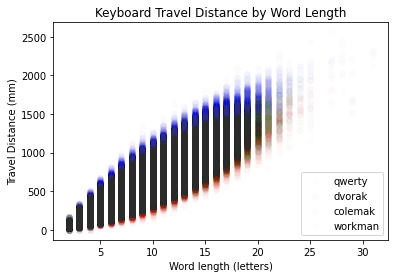

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df['length'], df['qwerty'], color = 'red', alpha = 0.01, label = 'qwerty')
plt.scatter(df['length'], df['dvorak'], color = 'blue', alpha = 0.01, label = 'dvorak')
plt.scatter(df['length'], df['colemak'], color = 'green', alpha = 0.01, label = 'colemak')
plt.scatter(df['length'], df['workman'], color = 'gray', alpha = 0.01, label = 'workman')


plt.xlabel('Word length (letters)')
plt.ylabel('Travel Distance (mm)')

plt.legend(loc = 'lower right')
plt.title('Keyboard Travel Distance by Word Length')

plt.show()

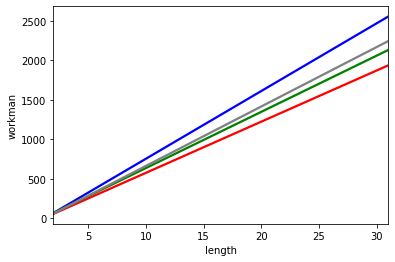

In [37]:
import seaborn as sns

sns.regplot(x='length', y='dvorak', data=df, color='blue', scatter=None)
sns.regplot(x='length', y='qwerty', data=df, color='red', scatter=None)
sns.regplot(x='length', y='colemak', data=df, color='green', scatter=None)
sns.regplot(x='length', y='workman', data=df, color='gray', scatter=None)

plt.show()

In [43]:
df.describe()

,length,qwerty,dvorak,colemak,workman,qw_dpl,dv_dpl,cl_dpl,wk_dpl,qw_dpj,dv_dpj,cl_dpj,wk_dpj
count,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000,370059.000000
mean,9.443435,540.471413,707.077586,597.542731,622.092560,56.459074,73.708418,62.388329,64.818133,64.000535,83.503368,70.700027,73.426031
std,2.915340,219.972870,281.827110,239.964927,254.332937,12.841879,15.203724,13.592962,14.543855,14.575114,16.975119,15.267430,16.225446
min,2.000000,19.050000,19.050000,19.050000,19.050000,6.350000,4.260000,4.762000,6.350000,9.525000,5.325000,6.350000,9.525000
25%,7.000000,380.540000,503.670000,421.350000,436.180000,47.867000,63.851000,53.322000,55.191000,54.269000,72.398000,60.421500,62.590000
50%,9.000000,517.100000,679.610000,573.600000,595.970000,56.345000,74.127000,62.316000,64.611000,63.367000,83.315000,70.143000,72.732000
75%,11.000000,676.540000,882.710000,749.400000,782.560000,64.783000,83.953000,71.403000,74.273000,72.864000,94.298000,80.375000,83.581000
max,31.000000,2119.490000,2427.090000,2558.520000,2390.000000,139.114000,147.436000,127.073000,132.145000,171.450000,181.970000,171.450000,177.240000
